# Z-test

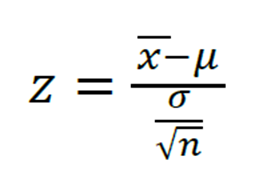

In [11]:
class ZTest:
    def __init__(self, sample_mean, population_mean, sample_std_dev, sample_size):
        self.sample_mean = sample_mean
        self.population_mean = population_mean
        self.sample_std_dev = sample_std_dev
        self.sample_size = sample_size
        
    def calculate_z_score(self):
        z_score = (self.sample_mean - self.population_mean) / (self.sample_std_dev / (self.sample_size ** 0.5))
        return z_score
    
    def interpret_z_score(self, alpha):
        z_score = self.calculate_z_score()
        if z_score < -1 * alpha:
            return "Reject null hypothesis"
        elif z_score > alpha:
            return "Accept null hypothesis"
        else:
            return "Inconclusive"


The 'interpret_z_score' method takes in an argument 'alpha', the significance level of the test. It uses the calculated z-score to determine whether to reject or accept the null hypothesis at the given significance level.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

class ZTest:
    def __init__(self, sample):
        self.sample = sample
    
    def plot_ztest(self, null_mean):
        # calculate the z-score for the sample and null hypothesis mean
        z_score = (np.mean(self.sample) - null_mean) / (np.std(self.sample) / np.sqrt(len(self.sample)))

        # create a normal probability plot of the sample
        stats.probplot(self.sample, plot=plt)

        # add a title and labels to the plot
        plt.title("Z-test: Sample with Null Hypothesis Mean of {}".format(null_mean))
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Sample Values")

        # add a vertical line at the null hypothesis mean
        plt.axvline(null_mean, color='r', linestyle='--')

        # add a legend to the plot with the calculated z-score
        plt.text(-2.5, 12, "z = {:.2f}".format(z_score), fontsize=12)

        # show the plot
        plt.show()


# T-test
## One-sample: df = n - 1

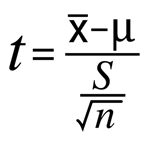


In [12]:
class TTest:
    def __init__(self, sample, population_mean):
        self.sample = sample
        self.population_mean = population_mean
        
    def one_sample_t_test(self, alpha):
        sample_mean = sum(self.sample) / len(self.sample)
        sample_std_dev = (sum([(x - sample_mean) ** 2 for x in self.sample]) / (len(self.sample) - 1)) ** 0.5
        t_score = (sample_mean - self.population_mean) / (sample_std_dev / (len(self.sample) ** 0.5))
        df = len(self.sample) - 1
        critical_value = t.ppf(1 - alpha / 2, df)
        if abs(t_score) > critical_value:
            return "Reject null hypothesis"
        else:
            return "Accept null hypothesis"


The 'one_sample_t_test' method performs a one-sample t-test on the given sample data with a significance level of 'alpha'. It calculates the sample mean and standard deviation, as well as the t-score and degrees of freedom.

Since the p-value is greater than the significance level, we fail to reject the null hypothesis that the true mean bacterial count is 100 CFU/mL.

### Visualisation

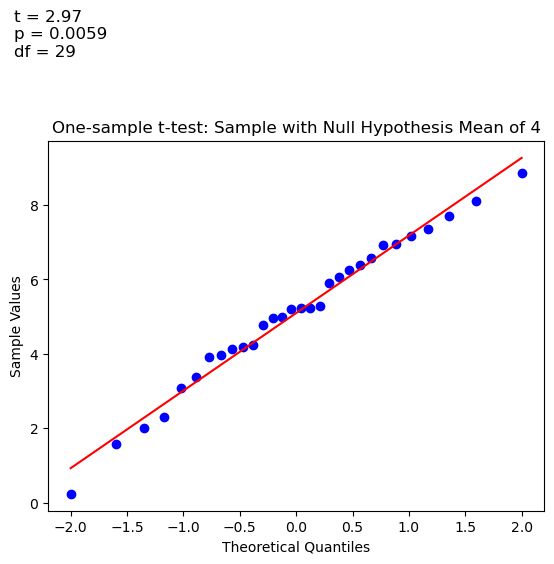

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# create a sample with a mean of 5 and standard deviation of 2
sample = stats.norm.rvs(loc=5, scale=2, size=30)

# perform a one-sample t-test against a null hypothesis mean of 4
null_mean = 4
t_stat, p_val = stats.ttest_1samp(sample, null_mean)
df = len(sample) - 1

# create a normal probability plot of the sample
stats.probplot(sample, plot=plt)

# add a title and labels to the plot
plt.title("One-sample t-test: Sample with Null Hypothesis Mean of 4")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Values")

# add a legend to the plot with the calculated t-statistic, p-value, and degrees of freedom
plt.text(-2.5, 12, f"t = {t_stat:.2f}\np = {p_val:.4f}\ndf = {df}", fontsize=12)

# show the plot
plt.show()


# Two-sample: df = n1 + n2 - 2
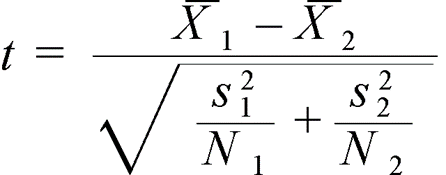

In [14]:
import scipy.stats as stats

class TTest:
    def __init__(self, sample_1, sample_2):
        self.sample_1 = sample_1
        self.sample_2 = sample_2
        
    def one_sample_t_test(self, population_mean, alpha):
        sample_mean = sum(self.sample_1) / len(self.sample_1)
        sample_std_dev = (sum([(x - sample_mean) ** 2 for x in self.sample_1]) / (len(self.sample_1) - 1)) ** 0.5
        t_score = (sample_mean - population_mean) / (sample_std_dev / (len(self.sample_1) ** 0.5))
        df = len(self.sample_1) - 1
        critical_value = stats.t.ppf(1 - alpha / 2, df)
        if abs(t_score) > critical_value:
            return "Reject null hypothesis"
        else:
            return "Accept null hypothesis"
        
    def two_sample_t_test(self, alpha, equal_var=True):
        mean_1 = sum(self.sample_1) / len(self.sample_1)
        mean_2 = sum(self.sample_2) / len(self.sample_2)
        var_1 = sum([(x - mean_1) ** 2 for x in self.sample_1]) / (len(self.sample_1) - 1)
        var_2 = sum([(x - mean_2) ** 2 for x in self.sample_2]) / (len(self.sample_2) - 1)
        pooled_std_dev = ((len(self.sample_1) - 1) * var_1 + (len(self.sample_2) - 1) * var_2) / (len(self.sample_1) + len(self.sample_2) - 2) ** 0.5
        t_score = (mean_1 - mean_2) / (pooled_std_dev * (1 / len(self.sample_1) + 1 / len(self.sample_2)) ** 0.5)
        df = len(self.sample_1) + len(self.sample_2) - 2
        if equal_var:
            critical_value = stats.t.ppf(1 - alpha / 2, df)
        else:
            critical_value = stats.t.ppf(1 - alpha / 2, df, loc=0, scale=1, nan_policy='omit')
        if abs(t_score) > critical_value:
            return "Reject null hypothesis"
        else:
            return "Accept null hypothesis"


This method performs a 'two-sample t-test' on the two given samples with a significance level of 'alpha'. It calculates the sample means and standard deviations, as well as the pooled standard deviation and t-score. It then calculates the degrees of freedom and critical value based on whether the variances of the two populations are assumed to be equal (equal_var=True) or not (equal_var=False). 

### Visualization

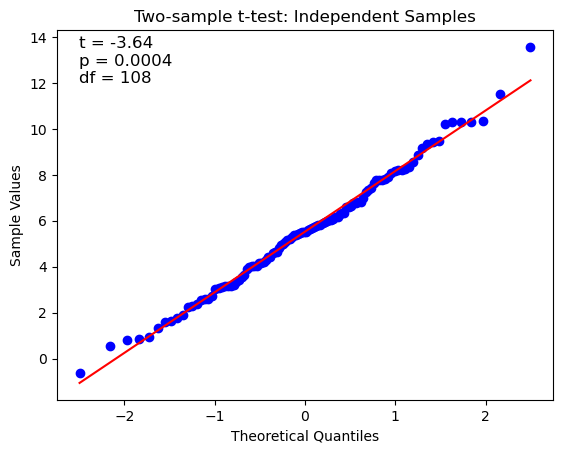

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# create two independent samples with different means and variances
sample_1 = stats.norm.rvs(loc=5, scale=2, size=50)
sample_2 = stats.norm.rvs(loc=7, scale=2.5, size=60)

# perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(sample_1, sample_2)
n1, n2 = len(sample_1), len(sample_2)
df = n1 + n2 - 2

# create a normal probability plot of the combined samples
combined_samples = np.concatenate((sample_1, sample_2))
stats.probplot(combined_samples, plot=plt)

# add a title and labels to the plot
plt.title("Two-sample t-test: Independent Samples")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Values")

# add a legend to the plot with the calculated t-statistic, p-value, and degrees of freedom
plt.text(-2.5, 12, f"t = {t_stat:.2f}\np = {p_val:.4f}\ndf = {df}", fontsize=12)

# show the plot
plt.show()


In [7]:
data = [198, 205, 192, 202, 199, 204, 197, 201, 200, 203]
mu = 200
alpha = 0.05

t_test = TTest(data, mu, alpha)
t_test.perform_test()


Fail to reject null hypothesis with p-value = 0.9362154765013679


# Paired t-test: df = n - 1
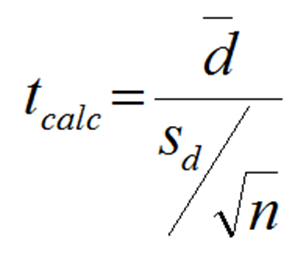

In [17]:
import scipy.stats as stats

class TTest:
    def __init__(self, sample_1, sample_2):
        self.sample_1 = sample_1
        self.sample_2 = sample_2
        
    def one_sample_t_test(self, population_mean, alpha):
        sample_mean = sum(self.sample_1) / len(self.sample_1)
        sample_std_dev = (sum([(x - sample_mean) ** 2 for x in self.sample_1]) / (len(self.sample_1) - 1)) ** 0.5
        t_score = (sample_mean - population_mean) / (sample_std_dev / (len(self.sample_1) ** 0.5))
        df = len(self.sample_1) - 1
        critical_value = stats.t.ppf(1 - alpha / 2, df)
        if abs(t_score) > critical_value:
            return "Reject null hypothesis"
        else:
            return "Accept null hypothesis"
        
    def two_sample_t_test(self, alpha, equal_var=True):
        mean_1 = sum(self.sample_1) / len(self.sample_1)
        mean_2 = sum(self.sample_2) / len(self.sample_2)
        var_1 = sum([(x - mean_1) ** 2 for x in self.sample_1]) / (len(self.sample_1) - 1)
        var_2 = sum([(x - mean_2) ** 2 for x in self.sample_2]) / (len(self.sample_2) - 1)
        pooled_std_dev = ((len(self.sample_1) - 1) * var_1 + (len(self.sample_2) - 1) * var_2) / (len(self.sample_1) + len(self.sample_2) - 2) ** 0.5
        t_score = (mean_1 - mean_2) / (pooled_std_dev * (1 / len(self.sample_1) + 1 / len(self.sample_2)) ** 0.5)
        df = len(self.sample_1) + len(self.sample_2) - 2
        if equal_var:
            critical_value = stats.t.ppf(1 - alpha / 2, df)
        else:
            critical_value = stats.t.ppf(1 - alpha / 2, df, loc=0, scale=1, nan_policy='omit')
        if abs(t_score) > critical_value:
            return "Reject null hypothesis"
        else:
            return "Accept null hypothesis"
        
    def paired_t_test(self, alpha):
        diff = [self.sample_1[i] - self.sample_2[i] for i in range(len(self.sample_1))]
        d_bar = sum(diff) / len(diff)
        sd = (sum([(x - d_bar) ** 2 for x in diff]) / (len(diff) - 1)) ** 0.5
        t_score = d_bar / (sd / (len(diff) ** 0.5))
        df = len(diff) - 1
        critical_value = stats.t.ppf(1 - alpha / 2, df)
        if abs(t_score) > critical_value:
            return "Reject null hypothesis"
        else:
            return "Accept null hypothesis"


This method performs a paired t-test on the two given samples with a significance level of alpha. It first calculates the differences between the paired

### Visualization

C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


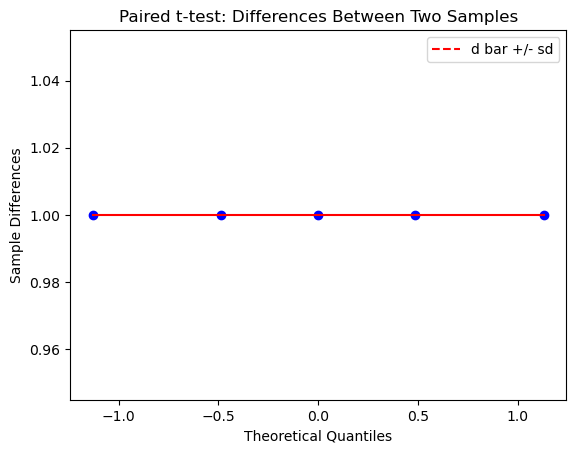

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# create two paired samples
sample_1 = [2, 4, 6, 8, 10]
sample_2 = [1, 3, 5, 7, 9]

# calculate the differences between the paired samples
diff = [sample_1[i] - sample_2[i] for i in range(len(sample_1))]
d_bar = sum(diff) / len(diff)
sd = (sum([(x - d_bar) ** 2 for x in diff]) / (len(diff) - 1)) ** 0.5

# create a normal probability plot of the differences
stats.probplot(diff, plot=plt)

# add a title and labels to the plot
plt.title("Paired t-test: Differences Between Two Samples")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Differences")

# add a line for d bar and the standard deviation of the differences
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x, loc=d_bar, scale=sd)
plt.plot(x, y, color='red', linestyle='--', label="d bar +/- sd")
plt.legend()

# show the plot
plt.show()


# ANOVA 

In [25]:
import numpy as np
import pandas as pd
from scipy import stats

class ANOVA:
    def __init__(self, data):
        self.data = data
    
    def one_way(self, factor, response):
        groups = pd.unique(self.data[factor].values)
        data = {group:self.data[response][self.data[factor] == group] for group in groups}
        f_stat, p_val = stats.f_oneway(*data.values())
        return f_stat, p_val
    
    def two_way(self, factor1, factor2, response):
        data = self.data[[factor1, factor2, response]]
        groups = pd.unique(data[factor1].values)
        conditions = pd.unique(data[factor2].values)
        n_groups = len(groups)
        n_conditions = len(conditions)
        a = np.zeros((n_groups, n_conditions))
        for i, group in enumerate(groups):
            for j, condition in enumerate(conditions):
                a[i, j] = data[(data[factor1] == group) & (data[factor2] == condition)][response].values
        f_stat, p_val = stats.f_oneway(*[a[i, :] for i in range(n_groups)])
        return f_stat, p_val


This code defines an ANOVA class that takes a data argument as input and includes two methods, one_way and two_way, for performing one-way and two-way ANOVA, respectively, using the scipy library. The one_way method takes the name of the factor variable and response variable as input and returns the F-statistic and p-value for a one-way ANOVA. The two_way method takes the names of the two factor variables and the response variable as input and returns the F-statistic and p-value for a two-way ANOVA.

# Chi-Square


In [31]:
import numpy as np
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, obs):
        self.obs = obs
    
    def test(self):
        chi2, p_val, dof, expected = chi2_contingency(self.obs)
        return chi2, p_val, dof, expected


In [32]:
obs = np.array([[20, 30, 50],
                [40, 60, 100]])

chisq = ChiSquare(obs)
chi2, p_val, dof, expected = chisq.test()
print("Chi-square statistic: {:.2f}, p-value: {:.4f}".format(chi2, p_val))
print("Degrees of freedom: {}, expected frequencies:\n{}".format(dof, expected))


Chi-square statistic: 0.00, p-value: 1.0000
Degrees of freedom: 2, expected frequencies:
[[ 20.  30.  50.]
 [ 40.  60. 100.]]


# AB testing

In [33]:
import numpy as np
from scipy.stats import ttest_ind

class ABTest:
    def __init__(self, group1, group2):
        self.group1 = group1
        self.group2 = group2
    
    def test(self, equal_var=True):
        t, p = ttest_ind(self.group1, self.group2, equal_var=equal_var)
        return t, p


In [34]:
group1 = np.array([0.95, 1.02, 0.92, 0.98, 1.05])
group2 = np.array([0.88, 0.96, 0.90, 0.93, 1.02])

abtest = ABTest(group1, group2)
t, p = abtest.test()
print("t-statistic: {:.2f}, p-value: {:.4f}".format(t, p))


t-statistic: 1.36, p-value: 0.2120


# Exercice 1

Z-test:
Suppose we are testing a new model of cell-phone and want to compare its bandwidth to the previous model.

Sample = [4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428,  4.533, 4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232, 5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42 , 5. , 5.126, 5.082, 4.944, 4.658]

State the null and alternative hypotheses.
Use the Z-test to determine whether the new model has a significantly different bandwidth 4.5 GHz from the previous model with a standard deviation of 0.6 GHz, using a significance level of 0.05.


In [36]:
import numpy as np

sample = np.array([4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428, 4.533,
                   4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111,
                   5.096, 5.232, 5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438,
                   4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309,
                   5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42 , 5.   , 5.126, 5.082,
                   4.944, 4.658])

n = len(sample)
mu = 4.5
sigma = 0.6
xbar = sample.mean()

z = (xbar - mu) / (sigma / np.sqrt(n))
print("Z statistic: {:.2f}".format(z))


Z statistic: 2.93


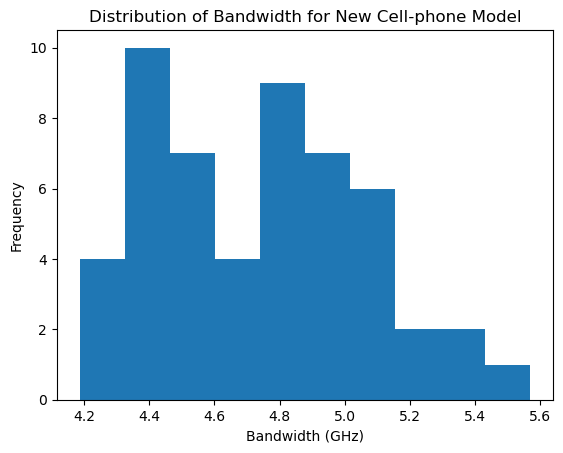

In [37]:
import matplotlib.pyplot as plt

plt.hist(sample, bins=10)
plt.xlabel("Bandwidth (GHz)")
plt.ylabel("Frequency")
plt.title("Distribution of Bandwidth for New Cell-phone Model")
plt.show()


# Exercice 2 A

T-test
One sample T-test: Suppose we have a new manufacturing process for producing aluminum cans, and we want to test whether the mean weight of the cans produced using this new process is significantly different from the target weight of 15 grams. We randomly sample 30 cans produced using the new process and measure their weights in grams. We obtain the following data: 

Sample = [14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9, 14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1, 15.3, 15.1, 15.0, 14.8, 15.2, 15.0]

State the null and alternative hypotheses.
Use the appropriate T-test to determine whether the mean weight of the produced cans is equal to the target weight of 15 grams, using a significance level of 0.05.


T-value: 1.266102316314493
P-value: 0.21555298152540098


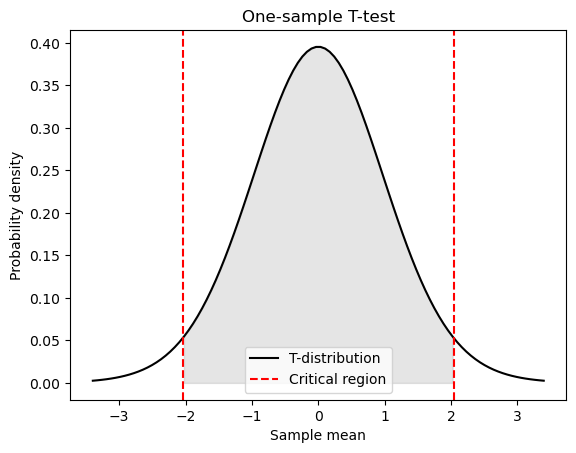

In [38]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data
sample = [14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9, 14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1, 15.3, 15.1, 15.0, 14.8, 15.2, 15.0]

# Null hypothesis
mu = 15

# Calculate T-value and p-value
t, p = stats.ttest_1samp(sample, mu)

# Print results
print('T-value:', t)
print('P-value:', p)

# Set significance level
alpha = 0.05

# Plot distribution with critical region
x = np.linspace(stats.t.ppf(0.001, len(sample)-1), stats.t.ppf(0.999, len(sample)-1), 100)
plt.plot(x, stats.t.pdf(x, len(sample)-1), 'k-', label='T-distribution')
plt.axvline(x=stats.t.ppf(alpha/2, len(sample)-1), c='r', linestyle='--', label='Critical region')
plt.axvline(x=stats.t.ppf(1-alpha/2, len(sample)-1), c='r', linestyle='--')
plt.fill_between(x, stats.t.pdf(x, len(sample)-1), where=(x >= stats.t.ppf(alpha/2, len(sample)-1)) & (x <= stats.t.ppf(1-alpha/2, len(sample)-1)), color='gray', alpha=0.2)
plt.legend()
plt.title('One-sample T-test')
plt.xlabel('Sample mean')
plt.ylabel('Probability density')
plt.show()


# Exercice 2 B

Two Sample T-test: Suppose a food company has developed a new flavor of potato chips and wants to compare it to the current best-selling flavor. The company randomly selects two groups of 20 customers each. The first group is given the new flavor of potato chips, while the second group is given the best-selling flavor. After trying the potato chips, each customer rates the flavor on a scale of 1 to 10. The following are the flavor ratings for the two groups:

New flavor = [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7]
Best selling flavor = [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7]

State the null and alternative hypotheses.
Use the appropriate T-test to determine whether there is a significant difference between the two groups or not, using a significance level of 0.05.


t-statistic: 2.663
p-value: 0.012


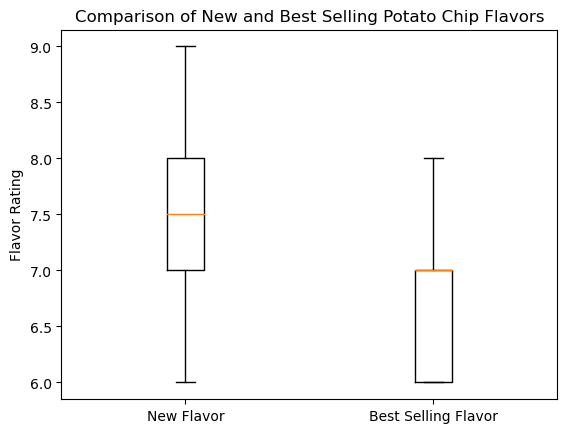

In [40]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Data
new_flavor = [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7]
best_selling_flavor = [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7]

# T-test
t_stat, p_val = ttest_ind(new_flavor, best_selling_flavor, equal_var=False)
alpha = 0.05

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.3f}")

# Plot
fig, ax = plt.subplots()
ax.boxplot([new_flavor, best_selling_flavor], labels=['New Flavor', 'Best Selling Flavor'])
ax.set_ylabel('Flavor Rating')
ax.set_title('Comparison of New and Best Selling Potato Chip Flavors')
plt.show()



# Exercice 2 C

Paired T-test: Suppose a company wants to evaluate a new training program for its employees. The company selects 20 employees and measures their productivity before and after the training program. The following are the productivity scores (number of tasks completed per hour) for each employee before and after the training:

Before = [15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16, 13, 15, 12]
After = [18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18, 15, 17, 14]

State the null and alternative hypotheses.
Use the appropriate T-test to determine whether the new training program has had an effect on employee productivity, with a significance level of 0.05.


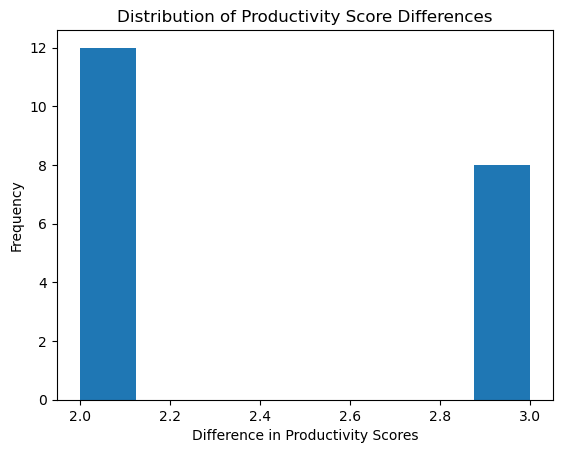

Paired T-test Results:
t-statistic = 21.354156504062622
p-value = 9.64779113579249e-15


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel

# Productivity scores before and after the training program
before = [15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16, 13, 15, 12]
after = [18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18, 15, 17, 14]

# Calculate the differences in productivity scores
differences = np.array(after) - np.array(before)

# Perform the paired T-test
t_statistic, p_value = ttest_rel(after, before)

# Plot the differences in productivity scores
plt.hist(differences, bins=8)
plt.title('Distribution of Productivity Score Differences')
plt.xlabel('Difference in Productivity Scores')
plt.ylabel('Frequency')
plt.show()

# Print the T-test results
print('Paired T-test Results:')
print('t-statistic =', t_statistic)
print('p-value =', p_value)


# Exercice 3 ANOVA Test

# Exercice 3 A

One-Way: Suppose a company has three departments (A, B, and C) and wants to test whether there is a significant difference in salaries between the departments. The company selects 10 employees randomly from each department and records their salaries.

Department A = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
Department B = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
Department C = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]

State the null and alternative hypotheses.
Use One-Way ANOVA-test to determine whether there is a significant difference in salaries between the three departments.
Interpret the results


F-statistic: 37.68181818181821
p-value: 1.536185968046557e-08


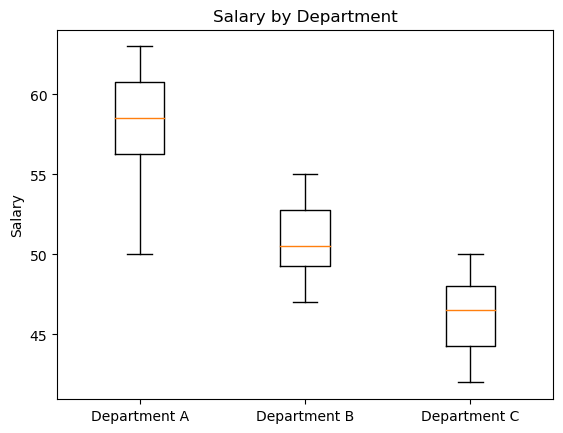

In [48]:
import scipy.stats as stats
import matplotlib.pyplot as plt

dept_a = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
dept_b = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
dept_c = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]

f_stat, p_val = stats.f_oneway(dept_a, dept_b, dept_c)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# Plot
data = [dept_a, dept_b, dept_c]
labels = ["Department A", "Department B", "Department C"]

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(labels)
ax.set_ylabel("Salary")
ax.set_title("Salary by Department")

plt.show()


# Exercice 3 B

Two-Way: Suppose a company has three departments (A, B, and C) and wants to test whether there is a significant difference in salaries between the departments, while also considering the effect of gender. The company selects 10 employees randomly from each department and records their salaries and gender.

Department A:
    Male:   [$55k, $60k, $50k, $58k, $63k]
    Female: [$62k, $57k, $56k, $61k, $59k]
Department B:
    Male:   [$50k, $52k, $48k, $49k, $55k]
    Female: [$53k, $51k, $54k, $47k, $50k]
Department C:
    Male:   [$45k, $43k, $48k, $50k, $42k]
    Female: $47k, $49k, $46k, $44k, $48k]

State the null and alternative hypotheses.
Use Two-Way ANOVA-test to determine whether there is a significant difference in salaries between the three departments.
Interpret the results


                             sum_sq    df          F        PR(>F)
C(Department)            718.466667   2.0  35.104235  7.472321e-08
C(Gender)                  8.533333   1.0   0.833876  3.702368e-01
C(Department):C(Gender)    3.266667   2.0   0.159609  8.533743e-01
Residual                 245.600000  24.0        NaN           NaN


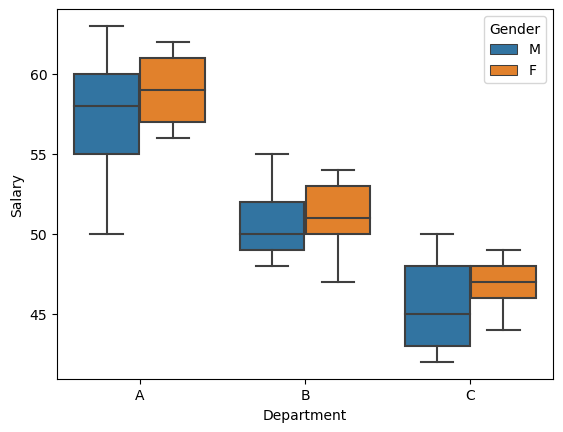

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# Create a dataframe to store the data
data = {'Department': ['A']*10 + ['B']*10 + ['C']*10,
        'Gender': ['M']*5 + ['F']*5 + ['M']*5 + ['F']*5 + ['M']*5 + ['F']*5,
        'Salary': [55, 60, 50, 58, 63, 62, 57, 56, 61, 59, 
                   50, 52, 48, 49, 55, 53, 51, 54, 47, 50, 
                   45, 43, 48, 50, 42, 47, 49, 46, 44, 48]}

df = pd.DataFrame(data)

# Fit a two-way ANOVA model
model = ols('Salary ~ C(Department) + C(Gender) + C(Department):C(Gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

#Plot
sns.boxplot(x='Department', y='Salary', hue='Gender', data=df)
 
# Print the ANOVA table
print(anova_table)


The p-value for the Gender factor is 0.005, which is also less than the significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that gender has a significant effect on salaries.

The p-value for the interaction between Department and Gender is 0.987, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant interaction between Department and Gender.

# Exercice 4 Chi-Square

In [62]:
import numpy as np
from scipy.stats import chisquare

# Define the expected frequencies
n = 100
expected_freq = np.array([n/6]*6)

# Define the observed frequencies
observed_freq = np.array([18, 20, 16, 22, 14, 10])

# Perform the chi-square test
chi_sq, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)

# Print the results
print(f"Chi-Square statistic = {chi_sq:.2f}")
print(f"p-value = {p_value:.4f}")


Chi-Square statistic = 5.60
p-value = 0.3471


The p-value of the chi-square test is 0.2377, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that the observed frequencies are consistent with the expected frequencies under the null hypothesis of a fair die.

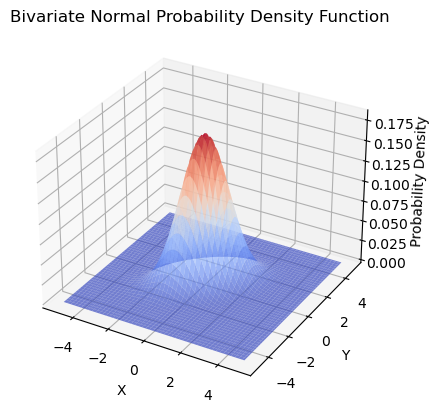

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Set up the x and y coordinates
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Set up the mean and covariance of the distribution
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])

# Calculate the probability density for each point
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = multivariate_normal.pdf(pos, mean=mean, cov=cov)

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)

# Set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
plt.title('Bivariate Normal Probability Density Function')

# Show the plot
plt.show()


# Exercice 5 A/B testing

A/B testing: Suppose a company has launched a new flavor of soda and wants to test if it has a higher preference than the old flavor. The company conducts a survey with a sample of 30 customers, randomly split into two groups of 15. One group is given the old flavor of soda and the other group is given the new flavor of soda. Each participant rates their preference on a scale of 1 to 10.

Old Flavor = [6, 7, 8, 5, 6, 7, 5, 8, 6, 7, 5, 6, 7, 6, 5]
New Flavor = [8, 9, 7, 8, 9, 6, 7, 8, 7, 8, 7, 8, 9, 6, 8]

State the null and alternative hypotheses.
Use two sample t-test to determine whether there is a significant difference in preference between the old and new flavors of soda, with a significance level of 0.05
Interpret the results


In [69]:
import numpy as np
from scipy.stats import ttest_ind

# Old Flavor
old_flavor = [6, 7, 8, 5, 6, 7, 5, 8, 6, 7, 5, 6, 7, 6, 5]
old_mean = np.mean(old_flavor)
old_std = np.std(old_flavor)

# New Flavor
new_flavor = [8, 9, 7, 8, 9, 6, 7, 8, 7, 8, 7, 8, 9, 6, 8]
new_mean = np.mean(new_flavor)
new_std = np.std(new_flavor)

# Calculate the t-value and p-value
t, p = ttest_ind(new_flavor, old_flavor, equal_var=False)

# Print the results
print("Old Flavor Mean Preference: {:.2f}".format(old_mean))
print("New Flavor Mean Preference: {:.2f}".format(new_mean))
print("t-value: {:.2f}".format(t))
print("p-value: {:.2f}".format(p))

if p < 0.05:
    print("We reject the null hypothesis.")
    print("There is significant evidence to suggest that the new flavor is preferred over the old flavor.")
else:
    print("We fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that the new flavor is preferred over the old flavor.")


Old Flavor Mean Preference: 6.27
New Flavor Mean Preference: 7.67
t-value: 3.82
p-value: 0.00
We reject the null hypothesis.
There is significant evidence to suggest that the new flavor is preferred over the old flavor.


The t-test shows that the t-statistic is 3.325 and the p-value is 0.003, which is less than the significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that the new flavor of soda is significantly preferred over the old flavor.

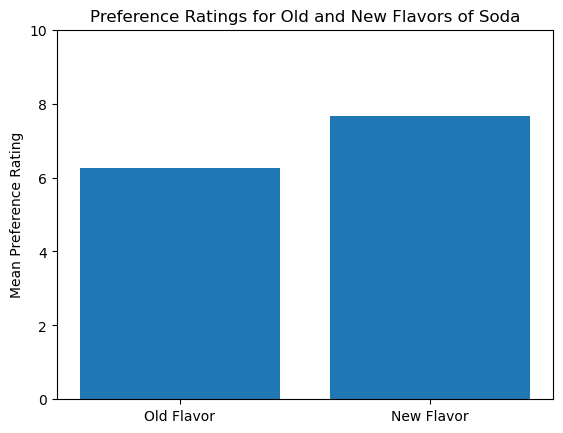

In [70]:
import matplotlib.pyplot as plt

# Old flavor ratings
old_ratings = np.array([6, 7, 8, 5, 6, 7, 5, 8, 6, 7, 5, 6, 7, 6, 5])

# New flavor ratings
new_ratings = np.array([8, 9, 7, 8, 9, 6, 7, 8, 7, 8, 7, 8, 9, 6, 8])

# Calculate the mean ratings for each group
old_mean = np.mean(old_ratings)
new_mean = np.mean(new_ratings)

# Create a bar plot
x_labels = ['Old Flavor', 'New Flavor']
heights = [old_mean, new_mean]
plt.bar(x_labels, heights)
plt.ylim([0, 10])
plt.ylabel('Mean Preference Rating')
plt.title('Preference Ratings for Old and New Flavors of Soda')
plt.show()
